<a href="https://colab.research.google.com/github/yeyevtushenko/AnalysisBMD_YevtusenkoBS-25/blob/main/%D0%9E%D0%B1%D1%80%D0%BE%D0%B1%D0%BA%D0%B0_%D1%82%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%B1%D1%96%D0%BE%D0%BC%D0%B5%D0%B4%D0%B8%D1%87%D0%BD%D0%B8%D1%85_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%91%D0%A1_25_%D0%84%D0%B2%D1%82%D1%83%D1%88%D0%B5%D0%BD%D0%BA%D0%BE_%D0%9A%D0%9F_%E2%84%966_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практична робота №6

## Імпорт основних модулів

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 1.Відібрати на Kaggle.com набір даних, який містить як мінімум 2 категоріальні змінні та одну кількісну. Якщо категоріальна змінна містить більше ніж 3 градації - залишити лише ті групи є найбільшими.

Завантаження даних

In [3]:
wine = pd.read_csv("https://raw.githubusercontent.com/yeyevtushenko/AnalysisBMD_YevtusenkoBS-25/Data/winequalityN.csv")

Переглянемо завантаженні дані командою .head() та виберемо лише ті дані, які відповідають умові

In [4]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Ми бачимо, що завантажений датасет має лише одну категоріальну змінну, а для того, щоб виконати дану роботу потрібно як мінімум 2. Тому візмьмемо кількісну змінну `alcohol` та зроби з неї категоріальну.

Перетворення `alcohol` на категоріальну змінну.
Це можна наступним чином, поділивши  на три категорії:
- низький/low: алкоголь < 10%
- середній/medium 10% ≤ алкоголь < 12%
- високий/high: алкоголь ≥ 12%

In [5]:
low_threshold = 10.0
high_threshold = 12.0


# Тут ми створюємо нову колонку вже з категоріальною змінною
wine["alcohol_category"] = wine["alcohol"].apply(lambda x: 'low' if x < low_threshold
                                                           else ('medium' if x < high_threshold else 'high'))


Отже, тепер виведемо лише дані, які будемо використовувати

In [6]:
wine[["type", "alcohol", "alcohol_category", "quality"]]

,type,alcohol,alcohol_category,quality
0,white,8.8,low,6
1,white,9.5,low,6
2,white,10.1,medium,6
3,white,9.9,low,6
4,white,9.9,low,6
...,...,...,...,...
6492,red,10.5,medium,5
6493,red,11.2,medium,6
6494,red,11.0,medium,6
6495,red,10.2,medium,5


`alcohol` виводимо для того, щоб переконатись, що категоріальні значенн `alcohol_category` присвоюються правильно.

## 2.Перевірити розподіл на нормальність за допомогою будь-якого критерію та зробити відповідні висновки.

Розмір вибірки > 5000, тому для перевірки розподілу на нормальність спробуємо використати тест Андерсона - Дарлінга.

Нульова гіпотеза (H0): Вибірка походить з певного теоретичного розподілу (наприклад, нормального, експоненційного тощо).

Альтернативна гіпотеза (H1): Вибірка не походить з цього теоретичного розподілу.



In [ ]:
import scipy.stats as stats
from scipy import stats

In [7]:
# Перевірка на нормальність за допомогою тесту Андерсона-Дарлінга
result = stats.anderson(wine["quality"], dist='norm')

print(f'Statistic: {result.statistic}')
for i in range(len(result.critical_values)):
  sl, cv = result. significance_level[i], result.critical_values[i]
  if result.statistic < cv:
    print(f'На рівні значущості {sl}% дані слідують нормальному розподілу, critical value = {cv}.')
  else:
      print(f'На рівні значущості {sl}% дані не слідують нормальному розподілу, critical value = {cv}.')


Statistic: 367.16663783139484
На рівні значущості 15.0% дані не слідують нормальному розподілу, critical value = 0.576.
На рівні значущості 10.0% дані не слідують нормальному розподілу, critical value = 0.656.
На рівні значущості 5.0% дані не слідують нормальному розподілу, critical value = 0.787.
На рівні значущості 2.5% дані не слідують нормальному розподілу, critical value = 0.917.
На рівні значущості 1.0% дані не слідують нормальному розподілу, critical value = 1.091.


Ми використали тест Андерсона-Дарлінга для перевірки нормальності розподілу якості вина. За результатами тесту, ми можемо сказати, про невідповідність даних нормальному розподілу на різних рівнях значущості.

## 3.Дати коротку характеристику кожній з груп за кількісною: розрахувати кількість спостережень, середнє значення та стандартне відхилення. Аналіз робити при розділенні на групи спочатку окремо за категоріальними змінними (наприклад, оцінити групи окремо при розділенні на стать і окремо на діагноз), а потім сумісно (наприклад, стать та діагноз одночасно).

### Розділенні на групи спочатку окремо за категоріальними змінними

Вид/тип до якості

In [9]:
wine_type = wine.groupby("type")["quality"].agg(["count", "mean", "std"])
print("Аналіз за типом вина:")
wine_type

Аналіз за типом вина:


,count,mean,std
type,,,
red,1599,5.636023,0.807569
white,4898,5.877909,0.885639


Міцність до якості

In [10]:
wine_alcohol_category = wine.groupby("alcohol_category")["quality"].agg(['count', 'mean', 'std'])
print("Аналіз за категорією алкоголю:")
wine_alcohol_category

Аналіз за категорією алкоголю:


,count,mean,std
alcohol_category,,,
high,975,6.536410,0.813425
low,2603,5.447945,0.714325
medium,2919,5.908873,0.847882


### Загальний

In [11]:
grouped = wine.groupby(["type", "alcohol_category"])["quality"].agg(['count', 'mean', 'std'])
print("Сумісний аналіз за типом вина і категорією алкоголю:")
grouped

Сумісний аналіз за типом вина і категорією алкоголю:


count      mean       std
type  alcohol_category                           
red   high                162  6.419753  0.761890
      low                 680  5.266176  0.600469
      medium              757  5.800528  0.805799
white high                813  6.559656  0.821776
      low                1923  5.512220  0.739991
      medium             2162  5.946809  0.859087

Висновок:
- Вино з високим вмістом алкоголю має вищу середню оцінку якості в обох категоріях (червоне та біле), порівняно з винами з низьким та середнім вмістом алкоголю.
- Біле вино в цілому має вищі середні оцінки якості порівняно з червоним вином у всіх категоріях алкоголю.
- Стандартні відхилення вказують на помірну варіабельність оцінок якості в усіх групах, з незначною тенденцією до більшої варіабельності серед білих вин порівняно з червоними.

## 4.Візуалізувати групи за допомогою ящикових діаграм.

#### Ящикова діаграма для типу вина до якості

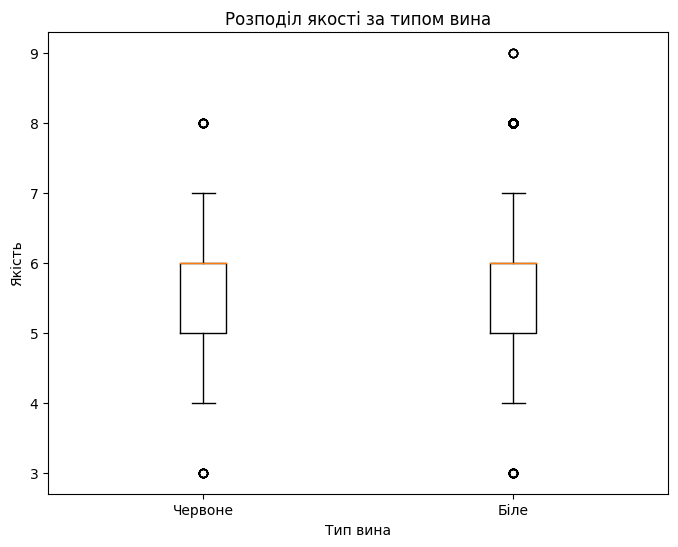

In [15]:
# Ящикова діаграма для типу вина до якості
plt.figure(figsize=(8, 6))
plt.boxplot([wine[wine['type'] == 'red']["quality"],
             wine[wine['type'] == 'white']["quality"]],
            labels=['Червоне', 'Біле'])
plt.title('Розподіл якості за типом вина')
plt.xlabel('Тип вина')
plt.ylabel('Якість')
plt.show()

#### Ящикова діаграма для міцності алкоголю до якості

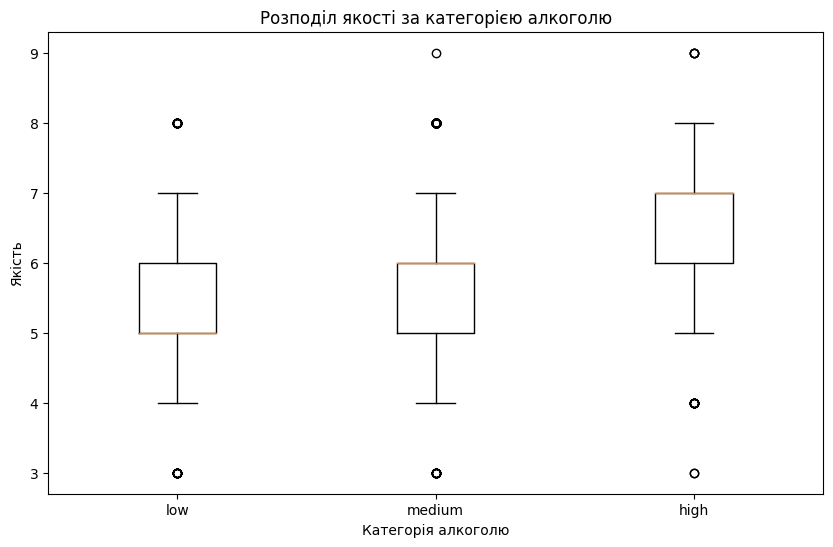

In [16]:
alcohol_levels = wine['alcohol_category'].unique()
plot = [wine[wine['alcohol_category'] == level]["quality"] for level in alcohol_levels]

# Ящикова діаграма для міцності алкоголю до якості
plt.figure(figsize=(10, 6))
plt.boxplot(plot, labels=alcohol_levels)
plt.title('Розподіл якості за категорією алкоголю')
plt.xlabel('Категорія алкоголю')
plt.ylabel('Якість')
plt.show()

## 5.Сформувати нульову та альтернативну гіпотези.

Нульова гіпотеза (H0):
Для типу вина: Немає статистично значущої різниці в середніх оцінках якості між червоним та білим винами.
Для категорії алкоголю: Немає статистично значущої різниці в середніх оцінках якості між різними категоріями алкоголю (низький, середній, високий).

Альтернативна гіпотеза (H1):
Для типу вина: Існує статистично значуща різниця в середніх оцінках якості між червоним та білим винами.
Для категорії алкоголю: Існує статистично значуща різниця в середніх оцінках якості між хоча б двома категоріями алкоголю (низький, середній, високий).

## 6.Перевірити гіпотезу та зробити висновки про те, яка саме гіпотеза підтвердилась.

Основною метою дисперсійного аналізу (ANOVA) є дослідження статистичної достовірності в відмінності між середніми за допомогою порівняння (аналізу) дисперсій. Розділення загальної дисперсії, дозволяє порівняти дисперсію залежної змінної, викликану відмінностями між групами, з дисперсією, викликаною внутрішньогруповою мінливістю. При істинності нульової гіпотези (про рівність середніх в декількох групах спостережень, вибраних з генеральної сукупності), оцінка дисперсії, пов'язаної з внутрішньогруповою мінливістю, повинна бути близькою до оцінки групової дисперсії. Якщо ви просто порівнюєте середні в двох вибірках, дисперсійний аналіз дасть той же результат, що і звичайний t-критерій для незалежних вибірок (якщо порівнюються дві незалежні групи об'єктів або спостережень) або t-критерій для залежних вибірок (якщо порівнюються дві змінні на одній і тій же множині об'єктів або спостережень).

In [31]:
from scipy.stats import f_oneway

# Проведення ANOVA тесту
f_stat, p_value = f_oneway(*[group['quality'].values for name, group in wine.groupby(['type', 'alcohol_category'])])

print(f"F-statistic: {f_stat:.4f}")
print(f"P-statistic: {p_value}")

F-statistic: 299.5880
P-statistic: 2.4137142987688234e-289


Результати тесту ANOVA (F-тесту) з величезним значенням F-статистики  і надзвичайно маленьким P-значенням вказують на дуже сильні докази проти нульової гіпотези. З таким малим P-значенням ми можемо відхилити нульову гіпотезу (H0) для обох факторів — типу вина та категорії/міцності алкоголю.

Гіптези:
Для типу вина існує статистично значуща різниця в середніх оцінках якості між червоним та білим винами. Таким чином, альтернативна гіпотеза (H1) підтверджується, а для категорії/міцності алкоголю існує статистично значуща різниця в середніх оцінках якості між різними категоріями алкоголю (низький, середній, високий). Отже, альтернативна гіпотеза (H1) також підтверджується для цього фактору

In [23]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Об'єднуємо категоріальні змінні в одну для проведення аналізу
wine['group'] = wine['type'] + "_" + wine['alcohol_category']

# Проведення Тьюківого тесту
tukey_results = pairwise_tukeyhsd(endog=wine['quality'],   # Дані для аналізу
                                  groups=wine['group'],    # Групи для порівняння
                                  alpha=0.05)              # Рівень значущості

# Конвертація результатів тесту в DataFrame для кращої візуалізації
tukey_results_df = pd.DataFrame(data=tukey_results._results_table.data[1:],
                                columns=tukey_results._results_table.data[0])

print(tukey_results_df)

# -1.1536

        group1        group2  meandiff   p-adj   lower   upper  reject
0     red_high       red_low   -1.1536  0.0000 -1.3498 -0.9573    True
1     red_high    red_medium   -0.6192  0.0000 -0.8135 -0.4249    True
2     red_high    white_high    0.1399  0.3060 -0.0532  0.3330   False
3     red_high     white_low   -0.9075  0.0000 -1.0912 -0.7239    True
4     red_high  white_medium   -0.4729  0.0000 -0.6558 -0.2901    True
5      red_low    red_medium    0.5344  0.0000  0.4158  0.6529    True
6      red_low    white_high    1.2935  0.0000  1.1768  1.4101    True
7      red_low     white_low    0.2460  0.0000  0.1459  0.3462    True
8      red_low  white_medium    0.6806  0.0000  0.5819  0.7793    True
9   red_medium    white_high    0.7591  0.0000  0.6458  0.8725    True
10  red_medium     white_low   -0.2883  0.0000 -0.3846 -0.1920    True
11  red_medium  white_medium    0.1463  0.0002  0.0515  0.2411    True
12  white_high     white_low   -1.0474  0.0000 -1.1413 -0.9535    True
13  wh

## 7.Провести аналіз за критерієм Тьюки та сформувати висновки.

In [36]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Проведення Тьюківого тесту
tukey_results = pairwise_tukeyhsd(endog=wine['quality'],   # Дані для аналізу
                                  groups=wine['type'] + "_" + wine['alcohol_category'],    # Групи для порівняння
                                  alpha=0.05)              # Рівень значущості
print(tukey_results)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
  red_high      red_low  -1.1536    0.0 -1.3498 -0.9573   True
  red_high   red_medium  -0.6192    0.0 -0.8135 -0.4249   True
  red_high   white_high   0.1399  0.306 -0.0532   0.333  False
  red_high    white_low  -0.9075    0.0 -1.0912 -0.7239   True
  red_high white_medium  -0.4729    0.0 -0.6558 -0.2901   True
   red_low   red_medium   0.5344    0.0  0.4158  0.6529   True
   red_low   white_high   1.2935    0.0  1.1768  1.4101   True
   red_low    white_low    0.246    0.0  0.1459  0.3462   True
   red_low white_medium   0.6806    0.0  0.5819  0.7793   True
red_medium   white_high   0.7591    0.0  0.6458  0.8725   True
red_medium    white_low  -0.2883    0.0 -0.3846  -0.192   True
red_medium white_medium   0.1463 0.0002  0.0515  0.2411   True
white_high    white_low  -1.0474    0.0 -1.1413 -0.9535

#### Виcновок

Огляд досліджень вказує на важливість вмісту алкоголю у визначенні якості вина, як для червоного, так і для білого. Загалом, вина з вищим вмістом алкоголю мають тенденцію до кращої якості порівняно з тими, що мають низький чи середній вміст алкоголю. Це спостерігається як у червоному, так і в білому вині, де високий вміст алкоголю асоціюється з вищою якістю. Також важливо відзначити, що не існує статистично значущої різниці в якості між червоним та білим вином з однаковим високим вмістом алкоголю, підкреслюючи, що алкогольний градус може мати більше значення для якості, ніж сам колір вина.

З іншого боку, серед червоного вина існують значущі різниці у якості між різними рівнями алкогольного вмісту, зокрема, червоне вино з низьким вмістом алкоголю має нижчу якість порівняно з середнім та високим вмістом алкоголю. Для білого вина, аналогічно, вища якість спостерігається у вин з вищим вмістом алкоголю порівняно з тими, що мають низький чи середній вміст.

Загальний висновок полягає в тому, що вміст алкоголю є значущим показником якості вина, незалежно від його кольору. Вищий вміст алкоголю асоціюється з вищою якістю, тоді як вина з низьким вмістом алкоголю, як правило, мають нижчу оцінку якості. Це підкреслює важливість врахування вмісту алкоголю при оцінці якості вина.